# imdb top 100 movies 2025 edition

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from google.generativeai.types.palm_safety_types import convert_rating_to_enum
from matplotlib.lines import lineStyles

warnings.filterwarnings("ignore")

In [177]:
# SET STULE UNTUK PLOTTING
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 18


LOADING DATA DENGAN PANDAS

In [178]:
#LOAD DATASET
# pd.read_csv('imdb_top_100_movies.csv)'
df = pd.read_csv('C:/Users/test/OneDrive/Desktop/PYTHON/dataset/top_100_movies_full_best_effort.csv')

print("DATA BERHASIL DI IMPORT")

DATA BERHASIL DI IMPORT


# BASIC INFO - KENALI STRUKTUR DATA

In [179]:
print("     df.shape - melihat dimensi data frame")
print(f"    Dimensi : {df.shape} (baris, kolom)\n")

     df.shape - melihat dimensi data frame
    Dimensi : (100, 14) (baris, kolom)



In [180]:
print("df.info() - untuk melihat info kolom dan tipe data")
print(df.info())

df.info() - untuk melihat info kolom dan tipe data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               100 non-null    int64  
 1   Title              100 non-null    object 
 2   Year               100 non-null    int64  
 3   Genre(s)           100 non-null    object 
 4   Director           100 non-null    object 
 5   Main Actor(s)      100 non-null    object 
 6   Country            100 non-null    object 
 7   IMDb Rating        99 non-null     float64
 8   Rotten Tomatoes %  97 non-null     float64
 9   Runtime (mins)     99 non-null     float64
 10  Language           100 non-null    object 
 11  Oscars Won         100 non-null    int64  
 12  Box Office ($M)    83 non-null     float64
 13  Metacritic Score   50 non-null     float64
dtypes: float64(5), int64(3), object(6)
memory usage: 11.1+ KB
None


In [181]:
print("df.columns - melihat nama semua kolom")
print(f"    {list(df.columns)}")

df.columns - melihat nama semua kolom
    ['Rank', 'Title', 'Year', 'Genre(s)', 'Director', 'Main Actor(s)', 'Country', 'IMDb Rating', 'Rotten Tomatoes %', 'Runtime (mins)', 'Language', 'Oscars Won', 'Box Office ($M)', 'Metacritic Score']


In [182]:
print("df.dtypes - untuk melihat tipe data dalam per kolom")
print(df.dtypes)

df.dtypes - untuk melihat tipe data dalam per kolom
Rank                   int64
Title                 object
Year                   int64
Genre(s)              object
Director              object
Main Actor(s)         object
Country               object
IMDb Rating          float64
Rotten Tomatoes %    float64
Runtime (mins)       float64
Language              object
Oscars Won             int64
Box Office ($M)      float64
Metacritic Score     float64
dtype: object


# PREVIEW DATA - MELIHAT DATA SAMPLE

In [183]:
print("df.head(5) - melihat 5 baris pertama")
print(df.head(5))

df.head(5) - melihat 5 baris pertama
   Rank                     Title  Year            Genre(s)  \
0     1  The Shawshank Redemption  1994               Drama   
1     2             The Godfather  1972         Crime|Drama   
2     3           The Dark Knight  2008  Action|Crime|Drama   
3     4    The Godfather: Part II  1974         Crime|Drama   
4     5              12 Angry Men  1957         Crime|Drama   

               Director                Main Actor(s)  \
0        Frank Darabont   Tim Robbins|Morgan Freeman   
1  Francis Ford Coppola      Marlon Brando|Al Pacino   
2     Christopher Nolan  Christian Bale|Heath Ledger   
3  Francis Ford Coppola     Al Pacino|Robert De Niro   
4          Sidney Lumet      Henry Fonda|Lee J. Cobb   

                        Country  IMDb Rating  Rotten Tomatoes %  \
0                 United States          9.3               91.0   
1                 United States          9.2               98.0   
2  United States|United Kingdom          9.0  

In [184]:
print("df.tail(3) - melihat 3 baris terakhir")
print(df.tail(3))

df.tail(3) - melihat 3 baris terakhir
    Rank             Title  Year               Genre(s)      Director  \
97    98  Double Indemnity  1944  Crime|Drama|Film-Noir  Billy Wilder   
98    99        Annie Hall  1977         Comedy|Romance   Woody Allen   
99   100  Some Like It Hot  1959         Comedy|Romance  Billy Wilder   

                      Main Actor(s)        Country  IMDb Rating  \
97  Fred MacMurray|Barbara Stanwyck  United States          8.0   
98         Woody Allen|Diane Keaton  United States          8.0   
99       Marilyn Monroe|Tony Curtis  United States          8.2   

    Rotten Tomatoes %  Runtime (mins) Language  Oscars Won  Box Office ($M)  \
97               98.0           107.0  English           0              5.7   
98               97.0            93.0  English           4             38.3   
99               94.0           121.0  English           1             25.0   

    Metacritic Score  
97               NaN  
98               NaN  
99            

In [185]:
print("df.sample(3) - melihat 3 baris random")
print(df.sample(3))

df.sample(3) - melihat 3 baris random
    Rank               Title  Year                  Genre(s)  \
62    63  The Princess Bride  1987  Adventure|Family|Fantasy   
1      2       The Godfather  1972               Crime|Drama   
85    86               Ikiru  1952                     Drama   

                Director                    Main Actor(s)        Country  \
62            Rob Reiner          Cary Elwes|Robin Wright  United States   
1   Francis Ford Coppola          Marlon Brando|Al Pacino  United States   
85        Akira Kurosawa  Takashi Shimura|Shinichi Himori          Japan   

    IMDb Rating  Rotten Tomatoes %  Runtime (mins)  Language  Oscars Won  \
62          8.1               97.0            98.0   English           0   
1           9.2               98.0           175.0   English           3   
85          8.1               96.0           143.0  Japanese           0   

    Box Office ($M)  Metacritic Score  
62             30.9               NaN  
1             2

# BASIC STATISTIK - STATISTIK DESKRIPTIF

In [186]:
print("df.describe() - statistik untuk kolom numerik")
print(df.describe())

df.describe() - statistik untuk kolom numerik
             Rank         Year  IMDb Rating  Rotten Tomatoes %  \
count  100.000000   100.000000    99.000000          97.000000   
mean    50.500000  1977.340000     8.385859          92.670103   
std     29.011492    22.743728     0.305063           6.454523   
min      1.000000  1931.000000     7.700000          71.000000   
25%     25.750000  1957.000000     8.100000          91.000000   
50%     50.500000  1980.000000     8.400000          94.000000   
75%     75.250000  1998.000000     8.600000          97.000000   
max    100.000000  2019.000000     9.300000         100.000000   

       Runtime (mins)  Oscars Won  Box Office ($M)  Metacritic Score  
count       99.000000  100.000000        83.000000             50.00  
mean       130.000000    1.810000       200.619277             82.68  
std         30.148273    2.372805       270.319883             11.14  
min         86.000000    0.000000         0.000000             59.00  
25% 

In [187]:
print("df.describe(inlcude='object') --- statistik untuk kolom kategorikal")
print(df.describe(include='object'))

df.describe(inlcude='object') --- statistik untuk kolom kategorikal
                               Title Genre(s)         Director  \
count                            100      100              100   
unique                            99       62               57   
top     The Bridge on the River Kwai    Drama  Stanley Kubrick   
freq                               2        8                5   

                           Main Actor(s)        Country Language  
count                                100            100      100  
unique                                92             21       13  
top     Charlie Chaplin|Paulette Goddard  United States  English  
freq                                   3             56       78  


# missing values - cek data kosong

In [188]:
print("df.isnull().sum() - jumlah missing values per kolom")
print(df.isnull().sum())

df.isnull().sum() - jumlah missing values per kolom
Rank                  0
Title                 0
Year                  0
Genre(s)              0
Director              0
Main Actor(s)         0
Country               0
IMDb Rating           1
Rotten Tomatoes %     3
Runtime (mins)        1
Language              0
Oscars Won            0
Box Office ($M)      17
Metacritic Score     50
dtype: int64


In [189]:
print("df.isnull().sum().sum() - total missing values ")
print(f"    Total : {df.isnull().sum().sum()} missing values")

df.isnull().sum().sum() - total missing values 
    Total : 72 missing values


# SECTION 2 DATA SELECTION DAN FILTERING

SELECTING COLUMNS MEMILIH KOLOM

In [190]:
print("df['Title'] - memilih 1 kolom (seriues)")
print(df['Title'].head(3))

df['Title'] - memilih 1 kolom (seriues)
0    The Shawshank Redemption
1               The Godfather
2             The Dark Knight
Name: Title, dtype: object


# selecting row - memilih baris

In [191]:
print("df.iloc[0] - memilih baris pertama ( by index )")
print(df.iloc[0])

df.iloc[0] - memilih baris pertama ( by index )
Rank                                          1
Title                  The Shawshank Redemption
Year                                       1994
Genre(s)                                  Drama
Director                         Frank Darabont
Main Actor(s)        Tim Robbins|Morgan Freeman
Country                           United States
IMDb Rating                                 9.3
Rotten Tomatoes %                          91.0
Runtime (mins)                            142.0
Language                                English
Oscars Won                                    0
Box Office ($M)                            58.0
Metacritic Score                           82.0
Name: 0, dtype: object


In [192]:
print("df.iloc[0:5] - memilih baris 0- 4 (5 baris pertama )")
print(df.iloc[0:5])

df.iloc[0:5] - memilih baris 0- 4 (5 baris pertama )
   Rank                     Title  Year            Genre(s)  \
0     1  The Shawshank Redemption  1994               Drama   
1     2             The Godfather  1972         Crime|Drama   
2     3           The Dark Knight  2008  Action|Crime|Drama   
3     4    The Godfather: Part II  1974         Crime|Drama   
4     5              12 Angry Men  1957         Crime|Drama   

               Director                Main Actor(s)  \
0        Frank Darabont   Tim Robbins|Morgan Freeman   
1  Francis Ford Coppola      Marlon Brando|Al Pacino   
2     Christopher Nolan  Christian Bale|Heath Ledger   
3  Francis Ford Coppola     Al Pacino|Robert De Niro   
4          Sidney Lumet      Henry Fonda|Lee J. Cobb   

                        Country  IMDb Rating  Rotten Tomatoes %  \
0                 United States          9.3               91.0   
1                 United States          9.2               98.0   
2  United States|United Kingdo

In [193]:
print("df.loc[df['Rating'] > 9.0 ] -- filter baris dengan kondisi'")
print(df.loc[df['IMDb Rating'] > 9.0] [['Title', 'IMDb Rating']])

df.loc[df['Rating'] > 9.0 ] -- filter baris dengan kondisi'
                      Title  IMDb Rating
0  The Shawshank Redemption          9.3
1             The Godfather          9.2


# filterint - multiple condition

In [194]:
print("MULTIPLE CONDITIONS DENGAN and ")
high_rated_recent = df[(df['IMDb Rating'] > 8.5) & (df['Year'] >= 2000)]
print(f"    Film Rating > 8.5 tahum >= 2000 : {len(high_rated_recent)} film")
print(high_rated_recent[['Title', 'IMDb Rating', 'Year']])

MULTIPLE CONDITIONS DENGAN and 
    Film Rating > 8.5 tahum >= 2000 : 9 film
                                                Title  IMDb Rating  Year
2                                     The Dark Knight          9.0  2008
5       The Lord of the Rings: The Return of the King          8.9  2003
7   The Lord of the Rings: The Fellowship of the Ring          8.8  2001
8                                           Inception          8.8  2010
10              The Lord of the Rings: The Two Towers          8.7  2002
18                                        City of God          8.6  2002
24                                      Spirited Away          8.6  2001
27                                           Parasite          8.6  2019
28                                       Interstellar          8.6  2014


# multiple condition dengan OR


In [195]:
extreme_rating = df[(df['IMDb Rating'] > 9.0) | (df['Year'] < 1950)]
print(f"    film rating > 9.0 atau tahun < 1950 : {len(extreme_rating)} film")

    film rating > 9.0 atau tahun < 1950 : 15 film


# QUERY METHOD - ALTERNATIVE FILTERING

In [196]:
print("df.query() - filtering dengan syntaks SQL- LIKE")
result = df.query('`IMDb Rating` >= 8.5 and Year >= 2000')
print(f"    Rating >= 8.5 dan year >= 2000: {len(result)} film")
print(result[['Title', 'IMDb Rating', 'Year']].head(3))


df.query() - filtering dengan syntaks SQL- LIKE
    Rating >= 8.5 dan year >= 2000: 12 film
                                               Title  IMDb Rating  Year
2                                    The Dark Knight          9.0  2008
5      The Lord of the Rings: The Return of the King          8.9  2003
7  The Lord of the Rings: The Fellowship of the Ring          8.8  2001


# section data manipulation & transformation

CREATING NEW COLUMNS - MMEBUAT KOLOM BARU

In [197]:
# ASSUMSI ADA KOLOM "VOTES" UNTUK CONTOH
# JIKA TIDAK ADA KITA SKIP ATAU BUAT DUMMY

if 'Votes' in df.columns:
    df['Votes_Million'] = df['Votes'] / 1_000_000
    print("     df['Votes_Million] = df['Votes'] / 1_000_000' ")
    print(df[['Title', 'Votes', 'Votes_Million']].head(3))
else:
    # BUAT DUMMY CPLUMN UNTUK DEMO
    df['Votes'] = np.random.randint(100000, 2000000, size=len(df))
    df['Votes_Million'] = df['Votes'] / 1_000_000
    print("     [DEMO] membuat kolom votes dan votes million")
    print(df[['Title', 'Votes', 'Votes_Million']].head(3))

     [DEMO] membuat kolom votes dan votes million
                      Title    Votes  Votes_Million
0  The Shawshank Redemption   262951       0.262951
1             The Godfather   281921       0.281921
2           The Dark Knight  1103035       1.103035


# kATEGORU BERDASARKAN RATING

In [198]:
df['Rating_Category'] = pd.cut(df['IMDb Rating'],
                               bins = [0,8.0,8.5,9.0,10.0],
                               labels = ['Good','Great','Excelent','Masterpiece'])
print("pd.cit() -- membuat kategori bersarkan range")
print(df[['Title','IMDb Rating', 'Rating_Category']].head(6))

pd.cit() -- membuat kategori bersarkan range
                                           Title  IMDb Rating Rating_Category
0                       The Shawshank Redemption          9.3     Masterpiece
1                                  The Godfather          9.2     Masterpiece
2                                The Dark Knight          9.0        Excelent
3                         The Godfather: Part II          9.0        Excelent
4                                   12 Angry Men          9.0        Excelent
5  The Lord of the Rings: The Return of the King          8.9        Excelent


# SORTING - MENGURUTKAN DATA

In [199]:
print("     SORT BY RATING ( DESCENDING )")
print(df.sort_values('IMDb Rating', ascending=False)[['Title','IMDb Rating', 'Year']].head(5))

     SORT BY RATING ( DESCENDING )
                      Title  IMDb Rating  Year
0  The Shawshank Redemption          9.3  1994
1             The Godfather          9.2  1972
2           The Dark Knight          9.0  2008
3    The Godfather: Part II          9.0  1974
4              12 Angry Men          9.0  1957


In [200]:
print("     SORT BY MULTIPLE COLUMNS ( YEAR ASC, RATING DESC) :")
print(df.sort_values(['Year', 'IMDb Rating'], ascending=[True, False])[['Title', 'Year', 'IMDb Rating']].head(5))

     SORT BY MULTIPLE COLUMNS ( YEAR ASC, RATING DESC) :
                  Title  Year  IMDb Rating
30          City Lights  1931          8.5
34         Modern Times  1936          8.5
73     The Wizard of Oz  1939          8.0
42   The Great Dictator  1940          8.4
76  The Grapes of Wrath  1940          8.1


# AGREGASI DATA ( GROUP BY )

In [201]:
print("df.groupby() -- Agregasi data per kategoru")

# ASUMSI ADA KOLOM GENRE JIKA TIDAK KITA BUAT DUMMY
if 'Genre' not in df.columns:
    genres = ['Drama', 'Action', 'Crime', 'Sci-fi', 'Comedy', 'Thriller']
    df['Genre'] = np.random.choice(genres, size=len(df))

df.groupby() -- Agregasi data per kategoru


In [202]:
print("     Rata- arata rating per genre : ")
genre_stas = df.groupby('Genre')['IMDb Rating'].agg(['mean','count','min','max'])
print(genre_stas.round(2))

     Rata- arata rating per genre : 
          mean  count  min  max
Genre                          
Action    8.39     12  8.0  8.9
Comedy    8.25     10  8.0  8.6
Crime     8.37     21  7.7  9.3
Drama     8.40     19  8.0  9.0
Sci-fi    8.36     15  8.0  9.0
Thriller  8.46     22  7.8  9.2


In [203]:
print("     Multiple aggregation dengan agg() :")
genre_multi = df.groupby('Genre').agg({
    'IMDb Rating' : ['mean','max'],
    'Year' : ['min','max'],
    'Votes' : 'sum'
})
print(genre_multi.head())

     Multiple aggregation dengan agg() :
       IMDb Rating       Year           Votes
              mean  max   min   max       sum
Genre                                        
Action    8.391667  8.9  1936  2003  10196047
Comedy    8.250000  8.6  1944  1995  12775469
Crime     8.371429  9.3  1940  2016  20752259
Drama     8.400000  9.0  1939  2014  23981827
Sci-fi    8.360000  9.0  1931  2019  13461555


# AOOKY DAN LAMBDA - CUSTOM OPERATIONS

In [204]:
print("apply() & lambda - Custom Transformations")

# membuat kolom dekade
df['Decade'] = df ['Year'].apply(lambda x: f"{(x//10)*10}s")
print("     Membuat kolom decade dari Year : ")
print(df[['Title', 'Year', 'Decade']].head(5))

apply() & lambda - Custom Transformations
     Membuat kolom decade dari Year : 
                      Title  Year Decade
0  The Shawshank Redemption  1994  1990s
1             The Godfather  1972  1970s
2           The Dark Knight  2008  2000s
3    The Godfather: Part II  1974  1970s
4              12 Angry Men  1957  1950s


In [205]:
# function untuk kategori umum
def year_category(year):
    if year < 1970:
        return 'Classic'
    elif year < 2000:
        return 'Modern'
    else:
        return 'Contemporary'

In [206]:
df['Era'] = df['Year'].apply(year_category)
print("     Kategorisasi Era:")
print(df['Era'].value_counts())

     Kategorisasi Era:
Era
Modern          42
Classic         38
Contemporary    20
Name: count, dtype: int64


# DATA AGGREGATION DAN PIVOT TABLE

value count - menghitung frekuensi

In [207]:
print("value_count - Menghitung distribusi kategori")
print("\n   Distribusi per Dekade : ")
print(df['Decade'].value_counts().sort_index())

value_count - Menghitung distribusi kategori

   Distribusi per Dekade : 
Decade
1930s     3
1940s    10
1950s    18
1960s     7
1970s    11
1980s    12
1990s    19
2000s    15
2010s     5
Name: count, dtype: int64


In [208]:
print("     Distribusi Ratong Category : ")
print(df['Rating_Category'].value_counts())


     Distribusi Ratong Category : 
Rating_Category
Great          59
Excelent       26
Good           12
Masterpiece     2
Name: count, dtype: int64


# PIVOT TABLES

In [209]:
print("pivot_table() -- membuat table pivot")

pivot = pd.pivot_table(df,
                        values = 'IMDb Rating',
                        index = 'Decade',
                        columns = 'Rating_Category',
                        aggfunc = 'count',
                        fill_value = 0)
print("     Jumlah film per dekade dan rating category")
print(pivot)

pivot_table() -- membuat table pivot
     Jumlah film per dekade dan rating category
Rating_Category  Good  Great  Excelent  Masterpiece
Decade                                             
1930s               1      2         0            0
1940s               4      5         1            0
1950s               2     14         2            0
1960s               1      5         1            0
1970s               2      6         2            1
1980s               1      9         1            0
1990s               0      8        10            1
2000s               0      9         6            0
2010s               1      1         3            0


# CROSSTAB -- TABULASI SILANG

In [210]:
print("pd.crosstab() -- tabulasi silang)")
cross = pd.crosstab(df['Era'], df['Rating_Category'], normalize='index') * 100
print(cross.round(2))

pd.crosstab() -- tabulasi silang)
Rating_Category   Good  Great  Excelent  Masterpiece
Era                                                 
Classic          21.05  68.42     10.53         0.00
Contemporary      5.00  50.00     45.00         0.00
Modern            7.32  56.10     31.71         4.88


# matplotlib visualization

In [211]:
# create figute denna multiple subsplots
fig = plt.figure(figsize = (16,12))


<Figure size 1600x1200 with 0 Axes>

# line plot --  ternd rating per tahun

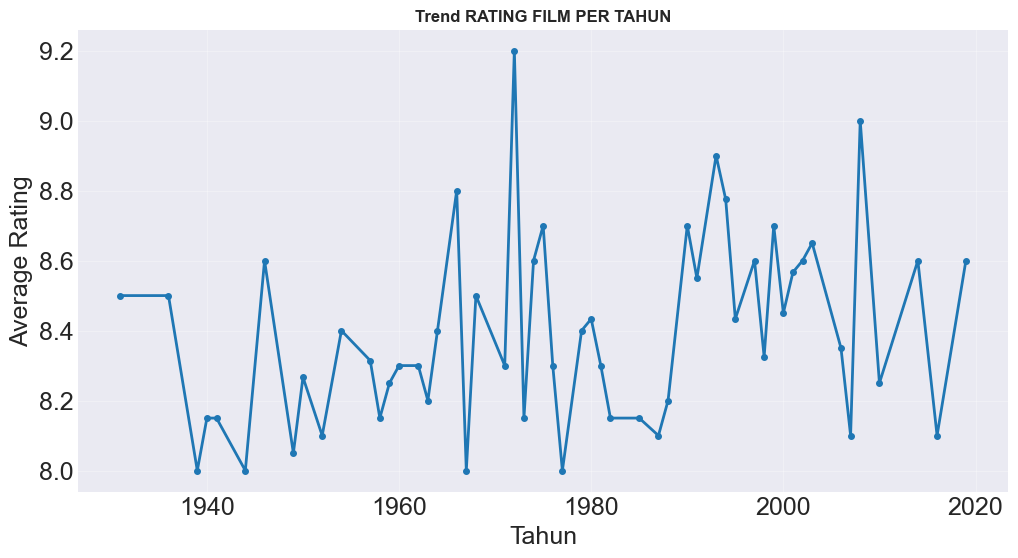

In [212]:
ax1 = plt.subplot(1,1,1)
yearly_avg = df.groupby('Year')['IMDb Rating'].mean()
ax1.plot(yearly_avg.index, yearly_avg.values, marker = 'o', linewidth=2, markersize=4)
ax1.set_title('Trend RATING FILM PER TAHUN', fontsize = 12, fontweight = 'bold')
ax1.set_xlabel('Tahun')
ax1.set_ylabel('Average Rating')
ax1.grid(True, alpha = 0.3)

# bar plot - JUMLAH FILM EPR DEKADE

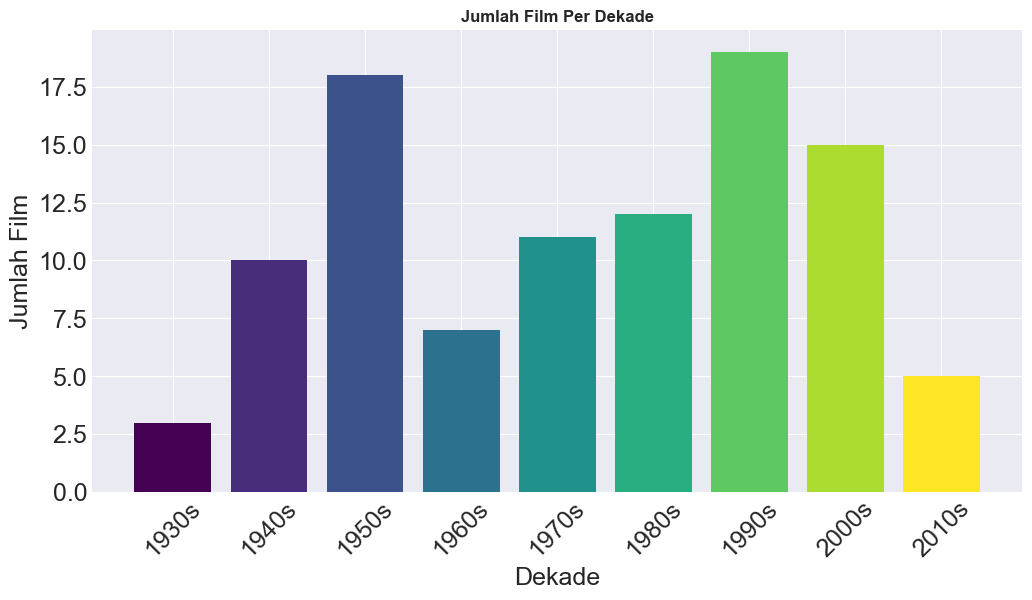

In [213]:
ax2 = plt.subplot(1, 1, 1)
decade_counts = df['Decade'].value_counts().sort_index()
colors = plt.cm.viridis(np.linspace(0, 1, len(decade_counts)))
ax2.bar(decade_counts.index, decade_counts.values, color=colors)
ax2.set_title('Jumlah Film Per Dekade', fontsize=12, fontweight='bold')
ax2.set_xlabel('Dekade')
ax2.set_ylabel('Jumlah Film')
ax2.tick_params(axis='x', rotation=45)

# Horizontal bar pplot

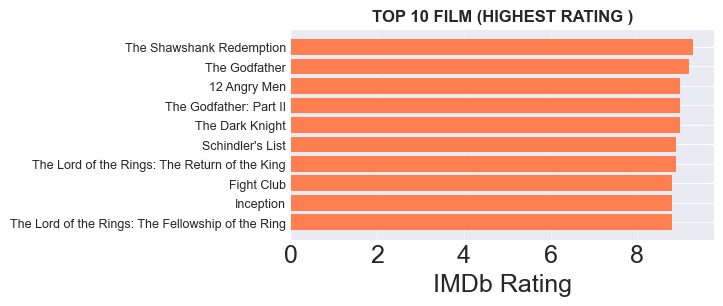

In [214]:
ax3 = plt.subplot(2,2,1)
top10 = df.nlargest(10, 'IMDb Rating')[['Title', 'IMDb Rating']].sort_values('IMDb Rating')
ax3.barh(range(len(top10)), top10['IMDb Rating'].values, color='coral')
ax3.set_yticks(range(len(top10)))
ax3.set_yticklabels(top10['Title'].values,fontsize=9)
ax3.set_title('TOP 10 FILM (HIGHEST RATING )', fontsize=12, fontweight='bold')
ax3.set_xlabel('IMDb Rating')
ax3.grid(axis='x', alpha= 0.3)


# histogram

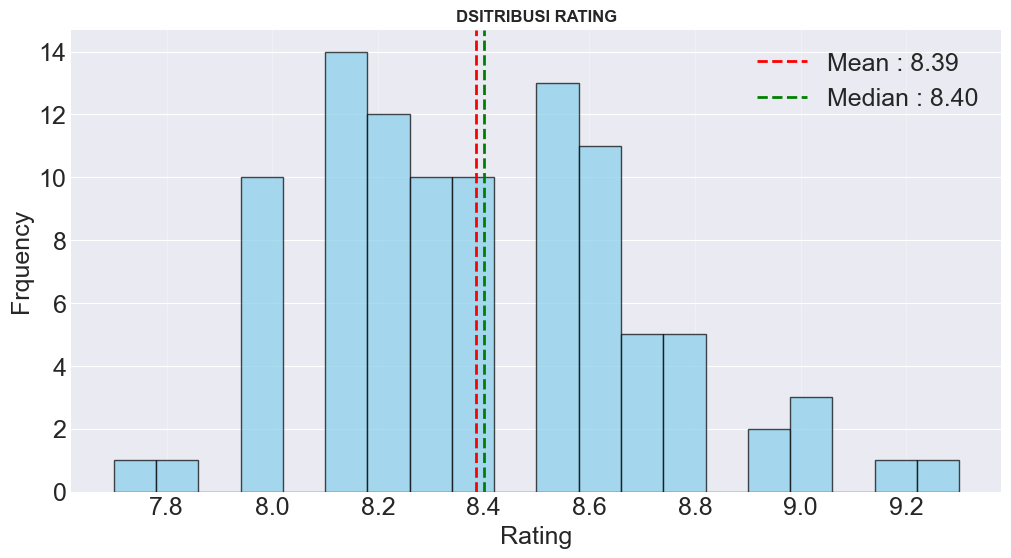

In [215]:
ax4 = plt.subplot()
ax4.hist(df['IMDb Rating'], bins=20, color='skyblue', edgecolor='black',alpha=0.7)
ax4.axvline(df['IMDb Rating'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean : {df['IMDb Rating'].mean():.2f}")
ax4.axvline(df['IMDb Rating'].median(), color='green', linestyle='--', linewidth=2, label=f"Median : {df['IMDb Rating'].median():.2f}")
ax4.set_title('DSITRIBUSI RATING', fontsize=12, fontweight='bold')
ax4.set_xlabel('Rating')
ax4.set_ylabel('Frquency')
ax4.legend()
ax4.grid(axis='x', alpha= 0.3)

# PIE CHART

Text(0.5, 1.0, 'DISTRIBUSI FILM PER ERA')

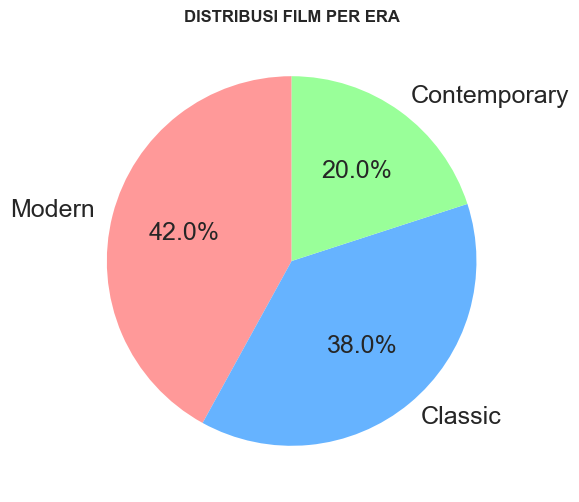

In [216]:
ax5 = plt.subplot()
era_counts = df['Era'].value_counts()
colors_pie = ['#ff9999', '#66b3ff', '#99ff99']
ax5.pie(era_counts.values, labels = era_counts.index, autopct= '%1.1f%%',
        colors=colors_pie, startangle=90)
ax5.set_title('DISTRIBUSI FILM PER ERA', fontsize=12, fontweight='bold')

#   scatter plot

Text(0, 0.5, 'Rating')

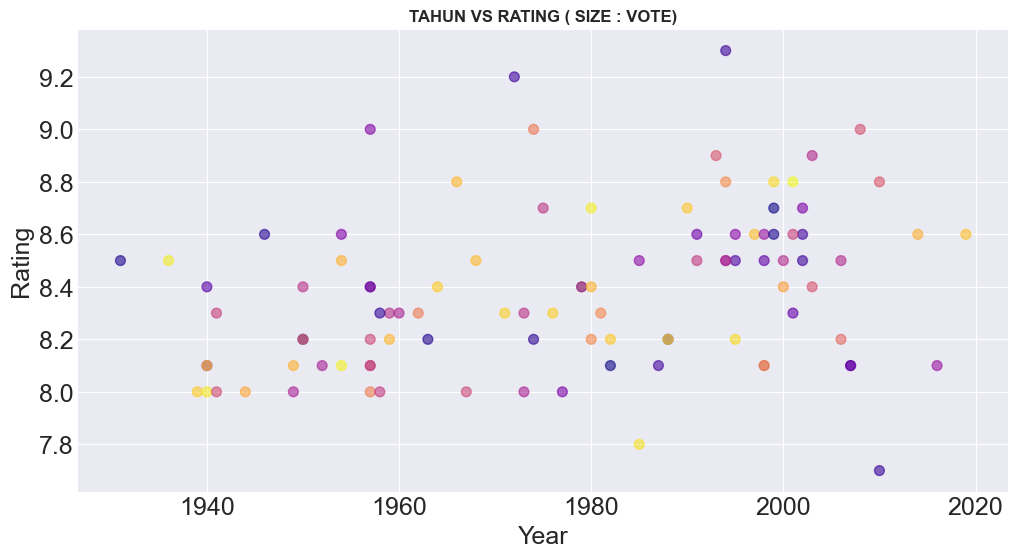

In [217]:
ax6 = plt.subplot()
scatter = ax6.scatter(df['Year'], df['IMDb Rating'], c=df['Votes'],
                      cmap='plasma', alpha=0.6, s=50)
ax6.set_title('TAHUN VS RATING ( SIZE : VOTE)', fontsize=12, fontweight='bold')
ax6.set_xlabel('Year')
ax6.set_ylabel('Rating')

# box plot

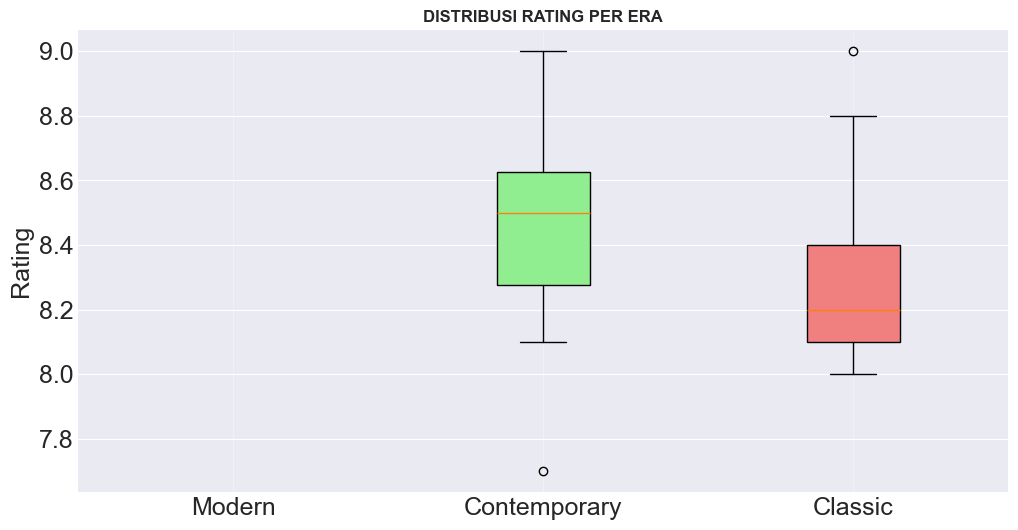

In [218]:
ax7 = plt.subplot()
era_data = [df[df['Era'] == era]['IMDb Rating'].values for era in df['Era'].unique()]
bp = ax7.boxplot(era_data, labels=df['Era'].unique(), patch_artist=True)
for patch, color in zip(bp['boxes'], ['lightblue', 'lightgreen', 'lightcoral']):
    patch.set_facecolor(color)

ax7.set_title('DISTRIBUSI RATING PER ERA', fontsize=12, fontweight='bold')
ax7.set_ylabel('Rating')
ax7.grid(axis='x', alpha= 0.3)


# stacked bar - rating category per decade

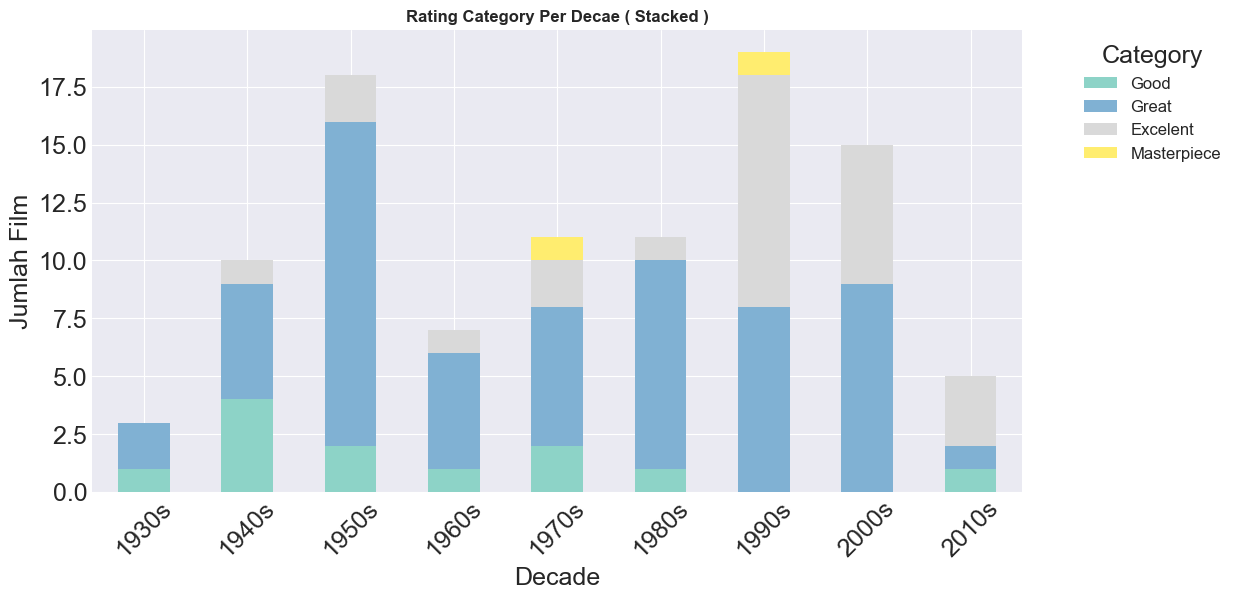

In [219]:
ax8 = plt.subplot()
pivot_plot = df.groupby(['Decade', 'Rating_Category']).size().unstack(fill_value=0)
pivot_plot.plot(kind='bar', stacked=True, ax=ax8,colormap='Set3')
ax8.set_title('Rating Category Per Decae ( Stacked )', fontsize=12, fontweight='bold')
ax8.set_xlabel('Decade')
ax8.set_ylabel('Jumlah Film')
ax8.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize= 12)
ax8.tick_params(axis='x', rotation=45)

# AREA PLOT - CUMULATIVE FILM OVER TIME

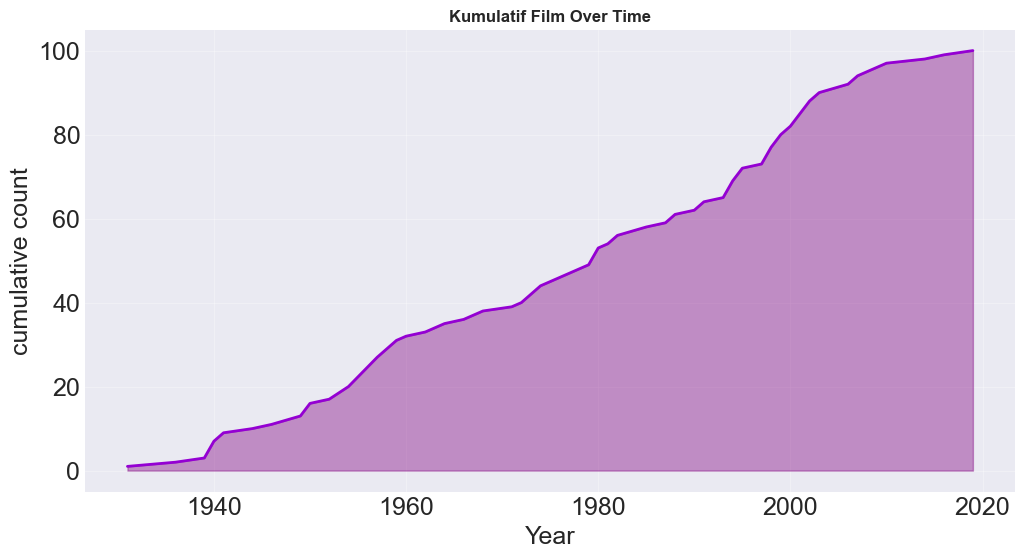

In [220]:
ax9 = plt.subplot()
cumulative = df.groupby('Year').size().cumsum()
ax9.fill_between(cumulative.index, cumulative.values, alpha = 0.4, color = 'purple')
ax9.plot(cumulative.index, cumulative.values, color = 'darkviolet', linewidth=2)
ax9.set_title("Kumulatif Film Over Time", fontsize=12, fontweight='bold')
ax9.set_xlabel('Year')
ax9.set_ylabel('cumulative count')
ax9.grid(True, alpha = 0.3)

In [221]:
plt.tight_layout()
plt.savefig('imdb_analysis.png', dpi=300, bbox_inches='tight')
print("visualisasi telah selasai di simpan ")
plt.show()

visualisasi telah selasai di simpan 


<Figure size 1200x600 with 0 Axes>

# ADVANCED PANDAS TECHIQUE

In [222]:
# STIRN G OEPRATION


# MEMBUAT KOLOM TITLE LENGTH
df['Title_Length'] = df['Title'].str.len()
print("     TOP 5 JUDUL TERPANJANG:")
print(df.nlargest(5, 'Title_Length')[['Title','Title_Length']])

     TOP 5 JUDUL TERPANJANG:
                                                Title  Title_Length
41  Dr. Strangelove or: How I Learned to Stop Worr...            68
7   The Lord of the Rings: The Fellowship of the Ring            49
9      Star Wars: Episode V – The Empire Strikes Back            46
5       The Lord of the Rings: The Return of the King            45
10              The Lord of the Rings: The Two Towers            37


# check if titile contains word

In [223]:
df['Has_The'] = df['Title'].str.contains('The', case=False, na=False)
print(f"        Judul dengan kata 'The' : {df['Has_The'].sum} film ")

        Judul dengan kata 'The' : <bound method Series.sum of 0      True
1      True
2      True
3      True
4     False
      ...  
95    False
96     True
97    False
98    False
99    False
Name: Has_The, Length: 100, dtype: bool> film 


# datetime operation ( jika ada kolom tanggal )

In [224]:
# buat dummy relase date

df['Relase_Date'] = pd.to_datetime(df['Year'].astype(str) + '-01-01')
df['Relase_Year'] = df['Relase_Date'].dt.year
df['Relase_Month'] = df['Relase_Date'].dt.month

print("     Sample datetime columns :")
print(df[['Title', 'Relase_Date', 'Relase_Year', 'Relase_Month']].head(3))

     Sample datetime columns :
                      Title Relase_Date  Relase_Year  Relase_Month
0  The Shawshank Redemption  1994-01-01         1994             1
1             The Godfather  1972-01-01         1972             1
2           The Dark Knight  2008-01-01         2008             1


# MERGE AND JOIN

In [228]:
print("\n>>> Merge & Join DataFrames")

# Buat dummy dataframe untuk demo
directors_df = pd.DataFrame({
    'Title': df['Title'].sample(10).values,
    'Directors' : ['Christopher Nolan', 'Quentin Tarantino', 'Martin Scorsese','Steven Spielberg', 'David Fincher', 'Ridley Scott','Denis Villeneuve', 'James Cameron', 'Coen Brothers', 'Peter Jackson']
})

# Merge
merged = pd.merge(df, directors_df, on='Title', how='left')
print("    Setelah merge dengan data Director:")
print(merged[['Title', 'IMDb Rating', 'Directors']].dropna().head(5))
print()


>>> Merge & Join DataFrames
    Setelah merge dengan data Director:
                         Title  IMDb Rating          Directors
3       The Godfather: Part II          9.0       Ridley Scott
19           Life Is Beautiful          8.6      Peter Jackson
22          The Usual Suspects          8.5  Quentin Tarantino
24               Spirited Away          8.6      Coen Brothers
33  Terminator 2: Judgment Day          8.5      James Cameron



# correlation matrix
hubungan antar variabel numerik

In [230]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation = df[numeric_cols].corr()
print(correlation.round(3))

                    Rank   Year  IMDb Rating  Rotten Tomatoes %  \
Rank               1.000 -0.438       -0.816              0.211   
Year              -0.438  1.000        0.317             -0.498   
IMDb Rating       -0.816  0.317        1.000             -0.155   
Rotten Tomatoes %  0.211 -0.498       -0.155              1.000   
Runtime (mins)    -0.340  0.304        0.440             -0.139   
Oscars Won        -0.153  0.184        0.191             -0.024   
Box Office ($M)   -0.487  0.469        0.410             -0.262   
Metacritic Score   0.019 -0.229        0.016              0.756   
Votes              0.096 -0.064       -0.072             -0.077   
Votes_Million      0.096 -0.064       -0.072             -0.077   
Title_Length      -0.205 -0.019        0.188              0.108   
Relase_Year       -0.438  1.000        0.317             -0.498   
Relase_Month         NaN    NaN          NaN                NaN   

                   Runtime (mins)  Oscars Won  Box Office ($M

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

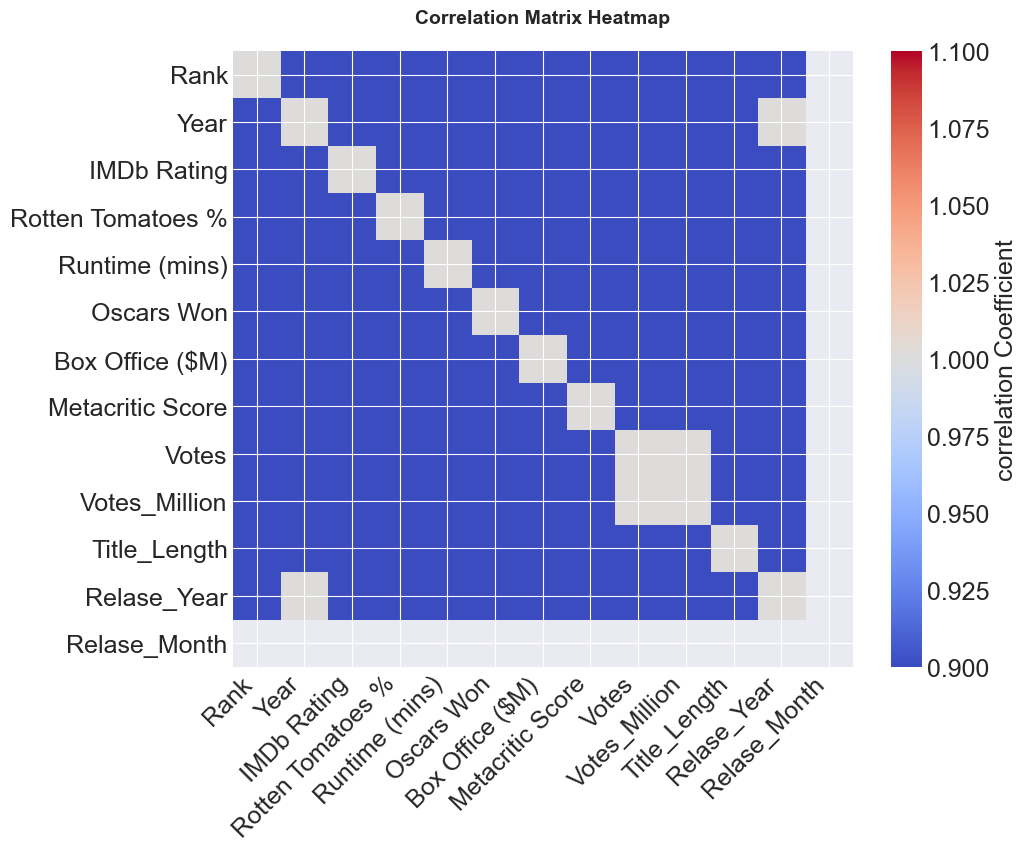

In [235]:
# visuaisasi dnegna  matrix corr

plt.figure(figsize = (10,8))
plt.imshow(correlation, cmap='coolwarm', aspect='auto', vmin=1, vmax=1)
plt.colorbar(label='correlation Coefficient')
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=45, ha='right')
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.title('Correlation Matrix Heatmap', fontsize=14, fontweight='bold', pad=20)

In [240]:
for i in range(len(correlation)):
    for j in range(len(correlation)):
        plt.text(j,i, f'{correlation.iloc[i,j]:.2f}',
                 ha='center', va='center', color='black', fontsize=9, fontweight='bold')
plt.tight_layout()
plt.savefig("correlation_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

In [244]:
# export data

df.to_csv('imdb_processed.csv', index=False)
print("succes")

# export to ecxel
df.to_excel('imdb_processed.xlsx', index=False, sheet_name='imdb_top100')
print("succes")

# export to json
df.to_json('imdb_processed.json', orient='records', indent=2)


succes
succes


In [243]:
print("\n[SECTION 7] FINAL SUMMARY")
print("-"*80)

print("📊 RINGKASAN DATASET:")
print(f"  Total Film           : {len(df)}")
print(f"  Rata-rata Rating     : {df['IMDb Rating'].mean():.2f}")
print(f"  Median Rating        : {df['IMDb Rating'].median():.2f}")
print(f"  Tahun Tertua         : {df['Year'].min()}")
print(f"  Tahun Terbaru        : {df['Year'].max()}")
print(f"  Total Votes          : {df['Votes'].sum():,}")

print(f"\n🏆 TOP PERFORMERS:")
print(f"  Highest Rated        : {df.loc[df['IMDb Rating'].idxmax(), 'Title']} ({df['IMDb Rating'].max()})")
print(f"  Most Voted           : {df.loc[df['Votes'].idxmax(), 'Title']} ({df['Votes'].max():,} votes)")
print(f"  Oldest Classic       : {df.loc[df['Year'].idxmin(), 'Title']} ({df['Year'].min()})")

print(f"\n📈 DISTRIBUSI:")
print(f"  Era Classic          : {(df['Era'] == 'Classic').sum()} film")
print(f"  Era Modern           : {(df['Era'] == 'Modern').sum()} film")
print(f"  Era Contemporary     : {(df['Era'] == 'Contemporary').sum()} film")

print("\n" + "="*80)
print("✓ ANALISIS SELESAI!")
print("="*80)


[SECTION 7] FINAL SUMMARY
--------------------------------------------------------------------------------
📊 RINGKASAN DATASET:
  Total Film           : 100
  Rata-rata Rating     : 8.39
  Median Rating        : 8.40
  Tahun Tertua         : 1931
  Tahun Terbaru        : 2019
  Total Votes          : 102,390,376

🏆 TOP PERFORMERS:
  Highest Rated        : The Shawshank Redemption (9.3)
  Most Voted           : The Lord of the Rings: The Fellowship of the Ring (1,987,223 votes)
  Oldest Classic       : City Lights (1931)

📈 DISTRIBUSI:
  Era Classic          : 38 film
  Era Modern           : 42 film
  Era Contemporary     : 20 film

✓ ANALISIS SELESAI!
